<a href="https://colab.research.google.com/github/blwishom/Data_Analytics_Project/blob/main/BarplotVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google'

In [52]:
import io
video_games = pd.read_csv(io.BytesIO(uploaded['VGSales.csv']))

In [53]:
sales_publisher = video_games.loc[:, ["Global_Sales", "Publisher"]]
sales_publisher.describe()

,Global_Sales
count,6536.000000
mean,0.717916
std,1.856836
min,0.010000
25%,0.110000
50%,0.290000
75%,0.730000
max,82.530000


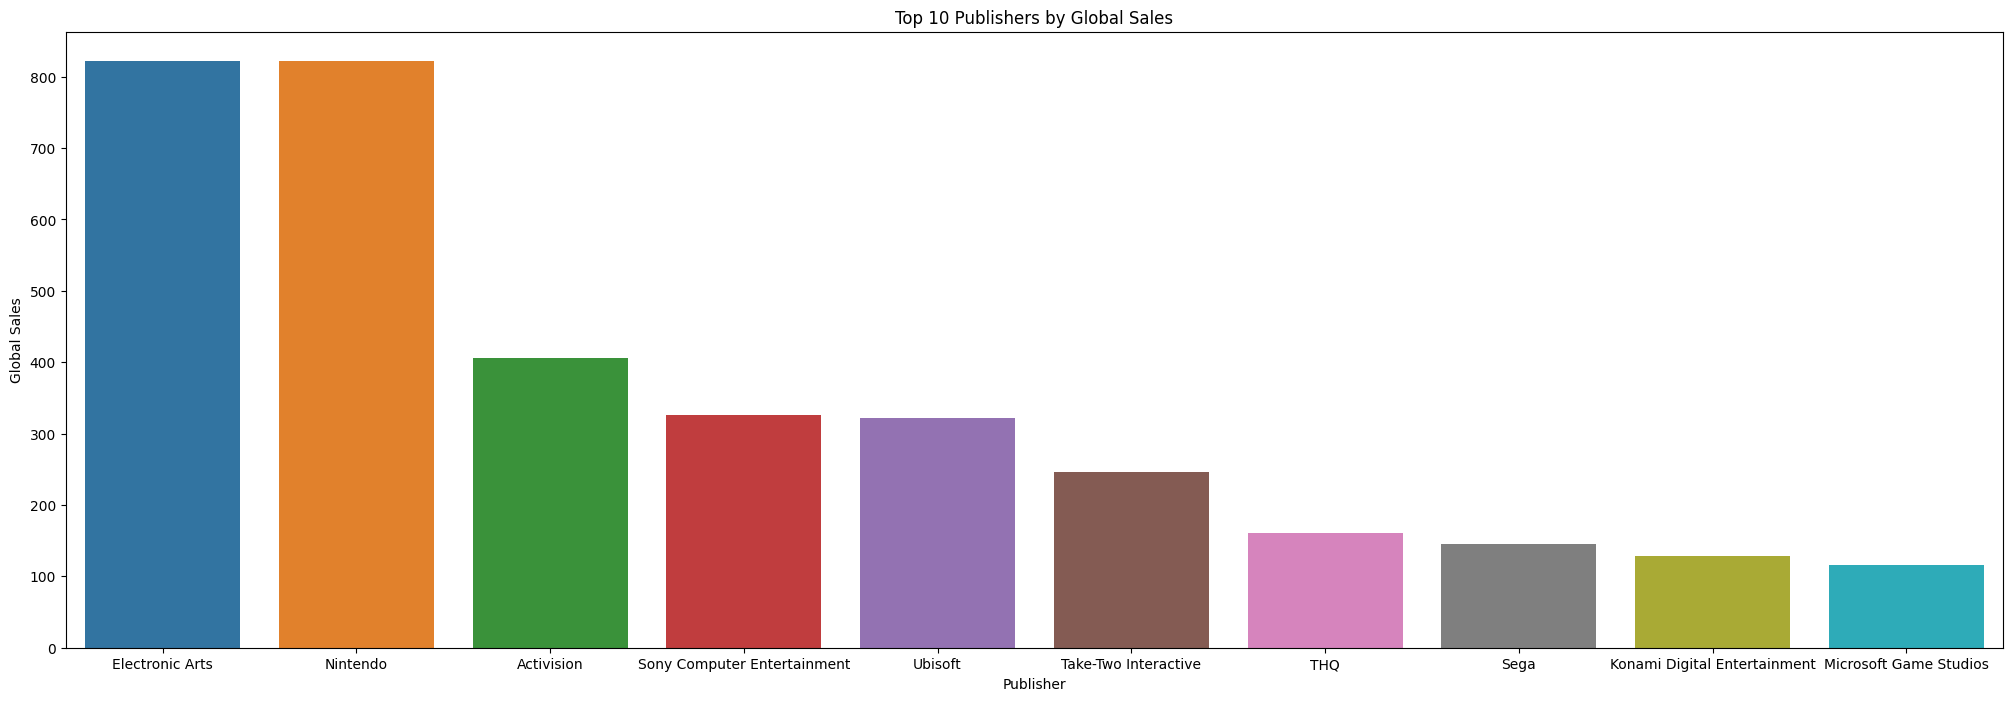

Minimum Global Sales: 0.01
Maximum Global Sales: 82.53
Mean:  0.9622418066648306
Median:  0.42
Range:  82.52


In [106]:
#specify by size
plt.figure(figsize=(25, 8))

#calculate the sum of 'Global_Sales' for each 'Publisher'
#Use .nlargest(10) method to retrieve the top 10 publishers with the highest global sales
publisher_sales = video_games.groupby('Publisher')['Global_Sales'].sum().nlargest(10)

#Use seaborn's barplot function to generate vertical bars for each publisher
sns.barplot(x = publisher_sales.index, y = publisher_sales.values)
plt.title('Top 10 Publishers by Global Sales')
plt.xlabel('Publisher')
plt.ylabel('Global Sales')
plt.show()

top_publishers = video_games[video_games['Publisher'].isin(publisher_sales.index)]

min_global_sales = top_publishers['Global_Sales'].min()
max_global_sales = top_publishers['Global_Sales'].max()

print('Minimum Global Sales:', min_global_sales)
print('Maximum Global Sales:', max_global_sales)

mean_sales = top_publishers['Global_Sales'].mean()
median_sales = top_publishers['Global_Sales'].median()
range_sales = top_publishers['Global_Sales'].max() - top_publishers['Global_Sales'].min()

print("Mean: ", mean_sales)
print("Median: ", median_sales)
print("Range: ", range_sales)

The bars represent the global sales figures for each publisher which allows for easy comparison and identification of the publishers with the highest sales. 

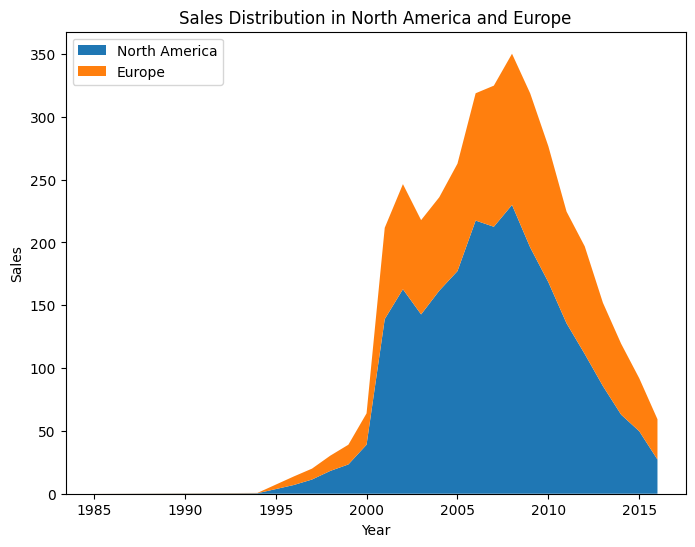

In [102]:
plt.figure(figsize=(8, 6))

na_sales = video_games.groupby('Year_of_Release')['NA_Sales'].sum()
eu_sales = video_games.groupby('Year_of_Release')['EU_Sales'].sum()

plt.stackplot(na_sales.index, na_sales.values, eu_sales.values, labels=['North America', 'Europe'])

plt.title('Sales Distribution in North America and Europe')
plt.xlabel('Year')
plt.ylabel('Sales')

plt.legend(loc='upper left')
plt.show()


This plot showcases the distribution of sales between North America and Europe over different years. This visualization enables us to compare the sales performance of North America and Europe. By observing the changes in the areas over different years, we can identify trends such as periods of growth or decline in sales in either region. We can also identify potential market opportunities by comparing the areas.